## Part 1: Building a Basic NN

In [92]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

In [93]:
df=pd.read_csv('dataset.csv')

In [94]:
df.drop(df[df['f1'] =='c'].index, inplace = True)
df.drop(df[df['f2'] =='f'].index, inplace = True)
df.drop(df[df['f3'] =='c'].index, inplace = True)
df.drop(df[df['f4'] =='a'].index, inplace = True)
df.drop(df[df['f5'] =='b'].index, inplace = True)
df.drop(df[df['f6'] =='d'].index, inplace = True)
df.drop(df[df['f7'] =='e'].index, inplace = True)

In [95]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
df1_x=df.drop(['target'],axis=1)
df1_y=df['target']
scaled_data=scale.fit_transform(df1_x)
scaled_data=pd.DataFrame(scaled_data, columns=df1_x.columns)
scaled_data

,f1,f2,f3,f4,f5,f6,f7
0,0.644092,0.844637,0.148213,0.908737,-0.694636,0.202839,0.463021
1,-0.842876,-1.123976,-0.160536,0.532503,-0.694636,-0.683852,-0.368158
2,1.238879,1.938311,-0.263452,-1.285961,-0.694636,-1.101863,0.598540
3,-0.842876,-0.998985,-0.160536,0.156269,0.119179,-0.493847,-0.922278
4,-1.140270,0.500911,-1.498446,0.908737,0.759842,1.406204,5.465156
...,...,...,...,...,...,...,...
755,-0.842876,0.219680,0.971542,1.159559,0.257700,0.570182,1.757975
756,0.941485,0.500911,1.074458,1.284971,-0.694636,0.000167,-0.247698
757,-1.140270,0.063441,0.148213,-1.285961,-0.694636,0.544848,-0.648230
758,-0.842876,-0.467772,0.354045,-1.285961,-0.694636,0.696852,-0.831932


In [96]:
scaled_data=scaled_data.join(df1_y)

<AxesSubplot:>

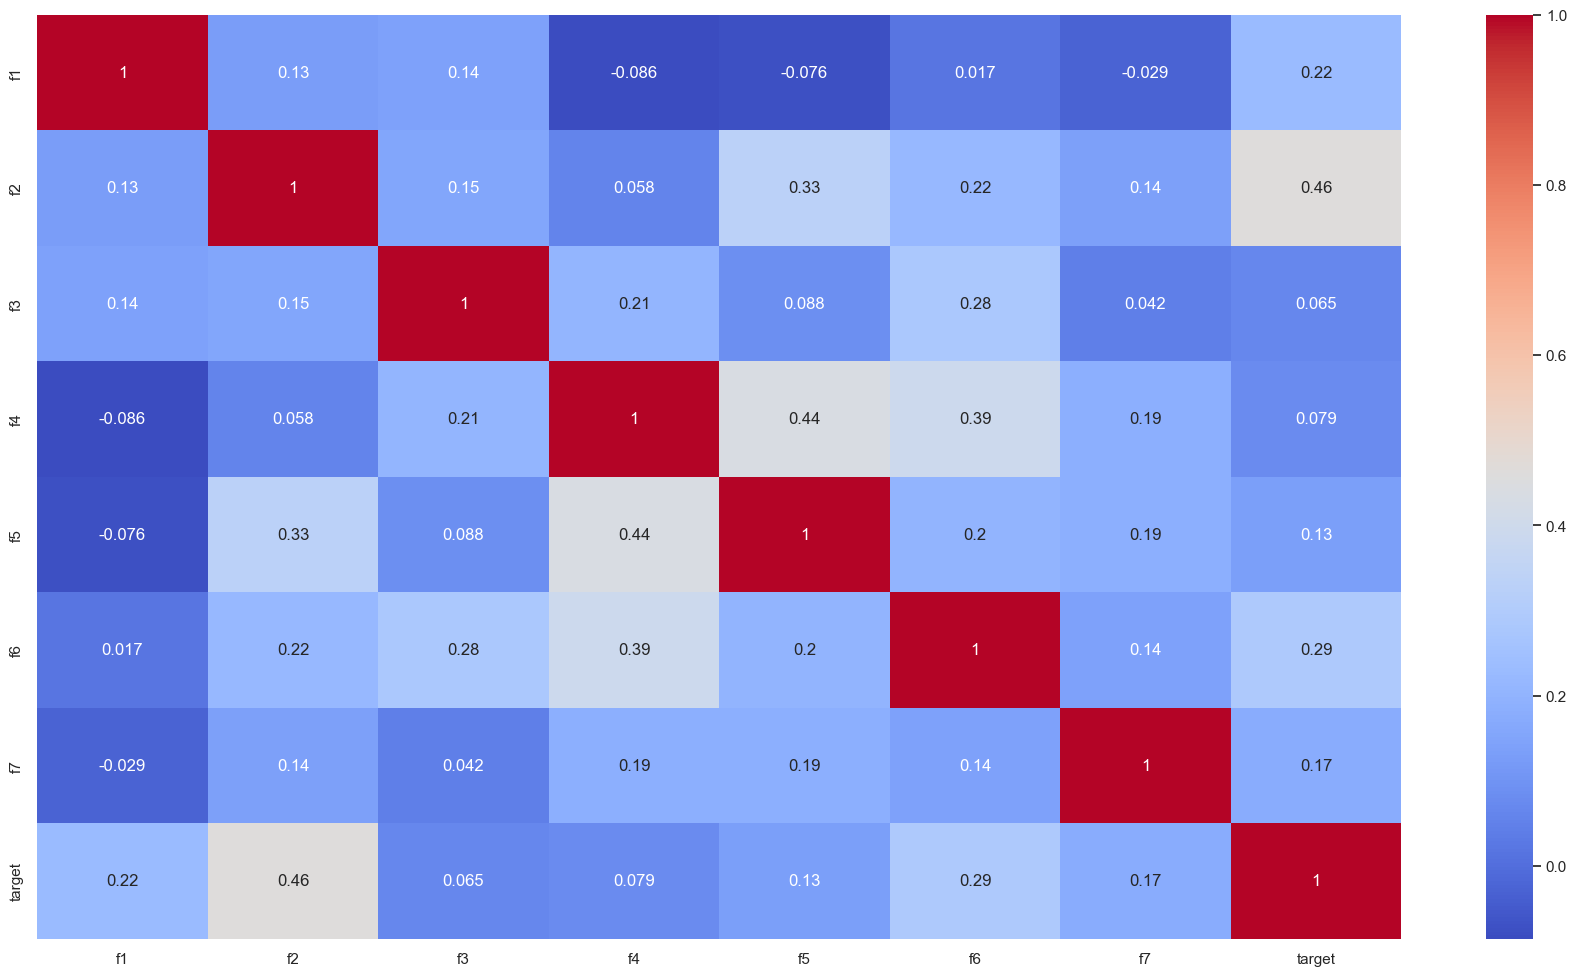

In [97]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(22,12)})
sns.heatmap(scaled_data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

<AxesSubplot:>

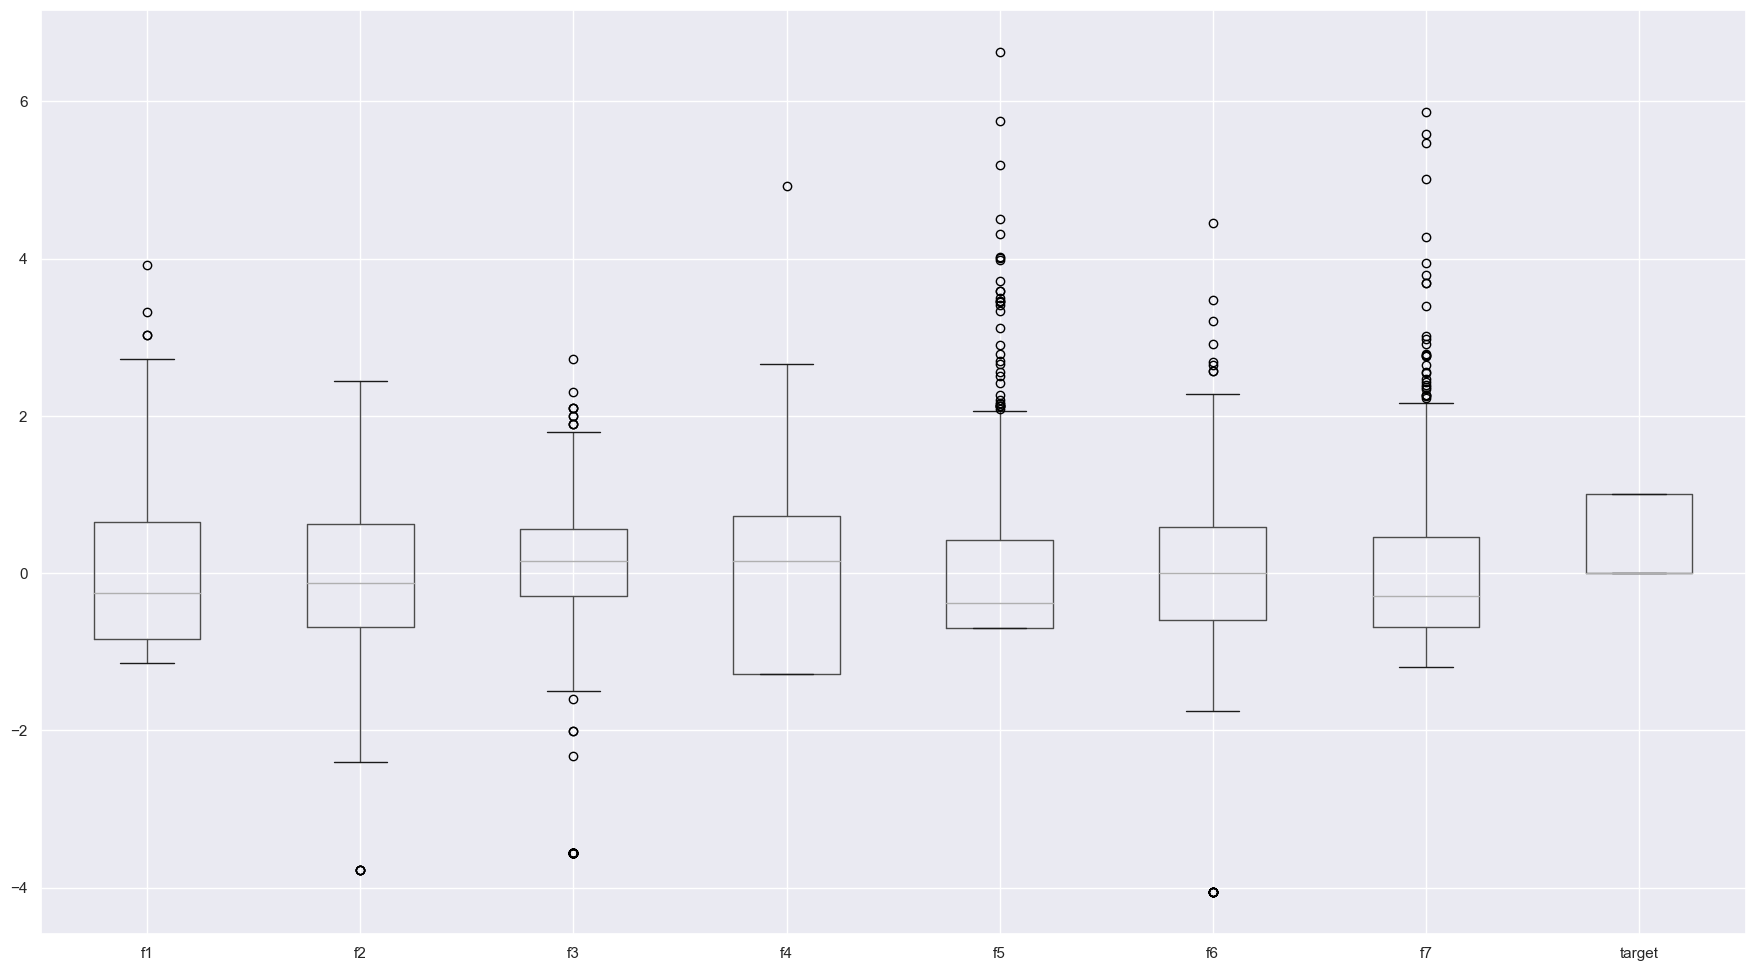

In [103]:
scaled_data.boxplot()

In [98]:
from sklearn.model_selection import train_test_split
X=scaled_data.drop(['target'],axis=1)
y=scaled_data['target']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2 , random_state=1)

In [99]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits

In [100]:
model=NeuralNetwork().to(device)
X=torch.tensor(X_train.values, dtype=torch.float32).to(device)
logits=model(X)
print(logits)
pred_probab=nn.Softmax(dim=1)(logits)
y_pred=pred_probab.argmax(1)
print('Predicted class:', y_pred)


tensor([[-0.1242,  0.1876],
        [ 0.0845,  0.1593],
        [ 0.0710,  0.0660],
        ...,
        [ 0.0532, -0.1673],
        [ 0.0885, -0.0241],
        [ 0.1069, -0.0616]], grad_fn=<AddmmBackward0>)
Predicted class: tensor([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [101]:
num_epochs=10
batch_size=64
learning_rate=0.001
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
criterion=nn.CrossEntropyLoss()
X_train_tensor=torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor=torch.tensor(y_train.values, dtype=torch.long).to(device)
for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X=X_train_tensor[i:i+batch_size].to(device)
        batch_y=y_train_tensor[i:i+batch_size].to(device)
        optimizer.zero_grad()
        logits=model(batch_X)
        #print(logits)
        loss=criterion(logits,batch_y)
        #print(loss)
        loss.backward()
        optimizer.step()
        if i % 100==0:
            print('Epoch', epoch+1,'/',num_epochs, 'Loss:', loss.item())


Epoch 1 / 10 Loss: 0.6756476759910583
Epoch 2 / 10 Loss: 0.5745884776115417
Epoch 3 / 10 Loss: 0.5281878113746643
Epoch 4 / 10 Loss: 0.505426824092865
Epoch 5 / 10 Loss: 0.4984573721885681
Epoch 6 / 10 Loss: 0.4927932322025299
Epoch 7 / 10 Loss: 0.48586413264274597
Epoch 8 / 10 Loss: 0.47980010509490967
Epoch 9 / 10 Loss: 0.4747459888458252
Epoch 10 / 10 Loss: 0.46964049339294434


Accuracy on the testing data: 76.31579041481018


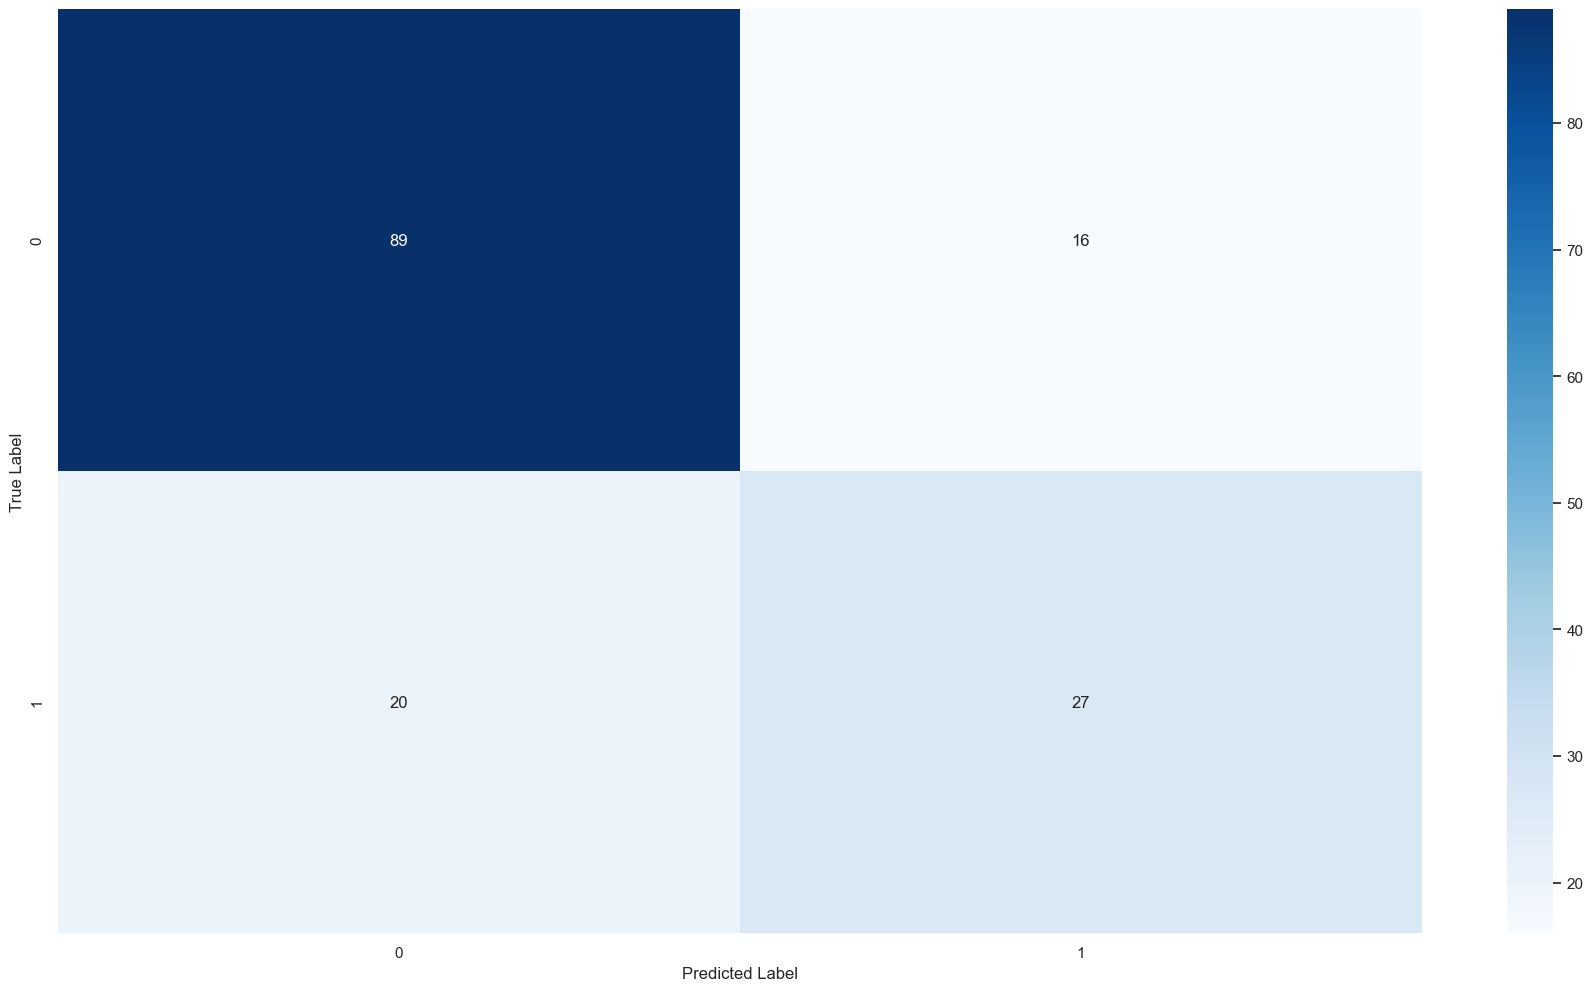

In [102]:
X_test_tensor=torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor=torch.tensor(y_test.values, dtype=torch.long).to(device)
model.eval()
with torch.no_grad():
    logits=model(X_test_tensor)
    pred_probab=nn.Softmax(dim=1)(logits)
    y_pred=pred_probab.argmax(1)
    accuracy=(y_pred==y_test_tensor).float().mean().item()*100
print('Accuracy on the testing data:', accuracy)
torch.save(model.state_dict(),"model_weights.pth")
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_mat=confusion_matrix(y_test, y_pred.cpu().numpy())
sns.heatmap(conf_mat, annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Part-2 Optimizing NN

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_prob):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits
dropout_prob_arr=[0.1, 0.2, 0.3, 0.4, 0.5]
def train_loop(model, criterion, optimizer, X_train_tensor, y_train_tensor, batch_size, num_epochs):
    for epoch in range(num_epochs):
        for i in range(0, len(X_train_tensor), batch_size):
            batch_X=X_train_tensor[i:i+batch_size].to(device)
            batch_y=y_train_tensor[i:i+batch_size].to(device)
            optimizer.zero_grad()
            logits=model(batch_X)
            loss=criterion(logits,batch_y)
            loss.backward()
            optimizer.step()
            if(i%100==0):
                print('Epoch', epoch+1,'/',num_epochs, 'Loss',loss.item())
results={}
for i in dropout_prob_arr:
    print('Training model with dropout probability =',i)
    device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model=NeuralNetwork(dropout_prob=i).to(device)
    criterion=nn.CrossEntropyLoss()
    batch_size=64
    num_epochs=10
    learning_rate=0.001
    optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
    X_train_tensor=torch.tensor(X_train.values, dtype=torch.float32).to(device)
    y_train_tensor=torch.tensor(y_train.values, dtype=torch.long).to(device)
    train_loop(model, criterion, optimizer, X_train_tensor, y_train_tensor, batch_size, num_epochs)
    X_test_tensor=torch.tensor(X_test.values, dtype=torch.float32).to(device)
    y_test_tensor=torch.tensor(y_test.values, dtype=torch.long).to(device)
    model.eval()
    with torch.no_grad():
        logits=model(X_test_tensor)
        pred_probab=nn.Softmax(dim=1)(logits)
        y_pred=pred_probab.argmax(1)
        accuracy=(y_pred==y_test_tensor).float().mean().item()*100
        results[i]=accuracy
    print('Accuracy of the testing data:', accuracy)
    print('')




Training model with dropout probability = 0.1
Epoch 1 / 10 Loss 0.7133796811103821
Epoch 2 / 10 Loss 0.5730889439582825
Epoch 3 / 10 Loss 0.5238485336303711
Epoch 4 / 10 Loss 0.5206634998321533
Epoch 5 / 10 Loss 0.523638904094696
Epoch 6 / 10 Loss 0.4960094392299652
Epoch 7 / 10 Loss 0.4782426357269287
Epoch 8 / 10 Loss 0.48141801357269287
Epoch 9 / 10 Loss 0.4686151444911957
Epoch 10 / 10 Loss 0.47065478563308716
Accuracy of the testing data: 77.63158082962036

Training model with dropout probability = 0.2
Epoch 1 / 10 Loss 0.6626424193382263
Epoch 2 / 10 Loss 0.5571956038475037
Epoch 3 / 10 Loss 0.5242258906364441
Epoch 4 / 10 Loss 0.5099288821220398
Epoch 5 / 10 Loss 0.5061366558074951
Epoch 6 / 10 Loss 0.5157453417778015
Epoch 7 / 10 Loss 0.49212825298309326
Epoch 8 / 10 Loss 0.5311510562896729
Epoch 9 / 10 Loss 0.4830106794834137
Epoch 10 / 10 Loss 0.5164939761161804
Accuracy of the testing data: 78.28947305679321

Training model with dropout probability = 0.3
Epoch 1 / 10 Loss 0.

In [13]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation_function):
        super(NeuralNetwork, self).__init__()
        self.flatten =nn.Flatten()
        self.linear_relu_stack =nn.Sequential(
            nn.Linear(7,128),
            activation_function,
            nn.Linear(128,64),
            activation_function,
            nn.Linear(64,2)
        )
    def forward(self,x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train_tensor=torch.tensor(X_train.values, dtype=torch.float32).to(device)
X_test_tensor=torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_train_tensor=torch.tensor(y_train.values, dtype=torch.long).to(device)
y_test_tensor=torch.tensor(y_test.values, dtype=torch.long).to(device)
batch_size=64
learning_rate=0.001
num_epochs=10
optimizers=[torch.optim.SGD, torch.optim.Adam, torch.optim.Adagrad]
activation_functions=[nn.ReLU(), nn.Tanh(), nn.Sigmoid()]
def train_loop(optimizer_class, activation_function):
    model=NeuralNetwork(activation_function).to(device)
    optimizer=optimizer_class(model.parameters(), lr=learning_rate)
    criterion=nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        for i in range(0, len(X_train_tensor),batch_size):
            batch_X=X_train_tensor[i:i+batch_size].to(device)
            batch_y=y_train_tensor[i:i+batch_size].to(device)
            optimizer.zero_grad()
            logits=model(batch_X)
            loss=criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
    with torch.no_grad():
        logits=model(X_test_tensor)
        pred_probab=nn.Softmax(dim=1)(logits)
        y_pred=pred_probab.argmax(1)
        accuracy=(y_pred==y_test_tensor).float().mean().item()*100
    return accuracy
results=[]
for optimizer_class in optimizers:
    for activation_function in activation_functions:
        accuracy=train_loop(optimizer_class, activation_function)
        results.append((optimizer_class.__name__, str(activation_function), accuracy))
        print('Optimizer:',optimizer_class.__name__, 'Activation function:',activation_function,'Accuracy:', accuracy)

Optimizer: SGD Activation function: ReLU() Accuracy: 32.236841320991516
Optimizer: SGD Activation function: Tanh() Accuracy: 69.07894611358643
Optimizer: SGD Activation function: Sigmoid() Accuracy: 69.07894611358643
Optimizer: Adam Activation function: ReLU() Accuracy: 77.63158082962036
Optimizer: Adam Activation function: Tanh() Accuracy: 78.94737124443054
Optimizer: Adam Activation function: Sigmoid() Accuracy: 78.28947305679321
Optimizer: Adagrad Activation function: ReLU() Accuracy: 76.31579041481018
Optimizer: Adagrad Activation function: Tanh() Accuracy: 78.94737124443054
Optimizer: Adagrad Activation function: Sigmoid() Accuracy: 69.07894611358643


#### Base model

In [22]:
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_prob):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.Tanh(),
            nn.Dropout(dropout_prob),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits
dropout_prob=0.2
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=NeuralNetwork(dropout_prob).to(device)
criterion=nn.CrossEntropyLoss()
batch_size=64
num_epochs=10
learning_rate=0.001
optimizer=torch.optim.Adagrad(model.parameters(),lr=learning_rate)
X_train_tensor=torch.tensor(X_train.values,dtype=torch.float32).to(device)
y_train_tensor=torch.tensor(y_train.values,dtype=torch.long).to(device)
for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X=X_train_tensor[i:i+batch_size].to(device)
        batch_y=y_train_tensor[i:i+batch_size].to(device)
        optimizer.zero_grad()
        logits=model(batch_X)
        #print(logits)
        loss=criterion(logits,batch_y)
        loss.backward()
        optimizer.step()
        if(i%100==0):
            print('Epoch', epoch+1,'/',num_epochs, 'Loss', loss.item())        
X_test_tensor=torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor=torch.tensor(y_test.values, dtype=torch.long).to(device)
model.eval()
with torch.no_grad():
    logits=model(X_test_tensor)
    pred_probab=nn.Softmax(dim=1)(logits)
    y_pred=pred_probab.argmax(1)
    accuracy=(y_pred==y_test_tensor).float().mean().item()*100
print('Accuracy of the testing data:',accuracy)


Epoch 1 / 10 Loss 0.7384121417999268
Epoch 2 / 10 Loss 0.6060173511505127
Epoch 3 / 10 Loss 0.5529248118400574
Epoch 4 / 10 Loss 0.5502589344978333
Epoch 5 / 10 Loss 0.5463982224464417
Epoch 6 / 10 Loss 0.5542169809341431
Epoch 7 / 10 Loss 0.5372018218040466
Epoch 8 / 10 Loss 0.5045195817947388
Epoch 9 / 10 Loss 0.4995810389518738
Epoch 10 / 10 Loss 0.5099983811378479
Accuracy of the testing data: 77.63158082962036


#### Learning rate scheduler

In [50]:
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_prob):
        super(NeuralNetwork, self).__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits
dropout_prob=0.4
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=NeuralNetwork(dropout_prob).to(device)
criterion=nn.CrossEntropyLoss()
batch_size=64
num_epochs=15
learning_rate=0.001
optimizer=torch.optim.Adagrad(model.parameters(), lr=learning_rate)
scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)
X_train_tensor=torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor=torch.tensor(y_train.values, dtype=torch.long).to(device)
for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size): 
        batch_X=X_train_tensor[i:i+batch_size].to(device)
        batch_y=y_train_tensor[i:i+batch_size].to(device)
        optimizer.zero_grad()
        logits=model(batch_X)
        loss=criterion(logits, batch_y)
        loss.backward()
        optimizer.step()
        if(i%100==0):
            print('Epoch',epoch+1, '/',num_epochs,'Loss',loss.item())
    scheduler.step(loss)
    #print('Epoch', epoch+1,'/',num_epochs,'LR',optimizer.param_groups[0]['lr'])      
X_test_tensor=torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor=torch.tensor(y_test.values, dtype=torch.long).to(device)
model.eval()
with torch.no_grad():
    logits=model(X_test_tensor)
    pred_probab=nn.Softmax(dim=1)(logits)
    y_pred=pred_probab.argmax(1)
    accuracy=(y_pred==y_test_tensor).float().mean().item()*100
print('Accuracy of the testing data:', accuracy)


Epoch 1 / 15 Loss 0.6772921085357666
Epoch 2 / 15 Loss 0.6692206263542175
Epoch 3 / 15 Loss 0.6335557103157043
Epoch 4 / 15 Loss 0.6287870407104492
Epoch 5 / 15 Loss 0.617944598197937
Epoch 6 / 15 Loss 0.6068373322486877
Epoch 7 / 15 Loss 0.6130418181419373
Epoch 8 / 15 Loss 0.6131966710090637
Epoch 9 / 15 Loss 0.6043530106544495
Epoch 10 / 15 Loss 0.5894082188606262
Epoch 11 / 15 Loss 0.6092422008514404
Epoch 12 / 15 Loss 0.5936620831489563
Epoch 13 / 15 Loss 0.5735378265380859
Epoch 14 / 15 Loss 0.5888596773147583
Epoch 15 / 15 Loss 0.5771500468254089
Epoch 00015: reducing learning rate of group 0 to 1.0000e-04.
Accuracy of the testing data: 80.26315569877625


Text(0.5, 1.0, 'Comparison')

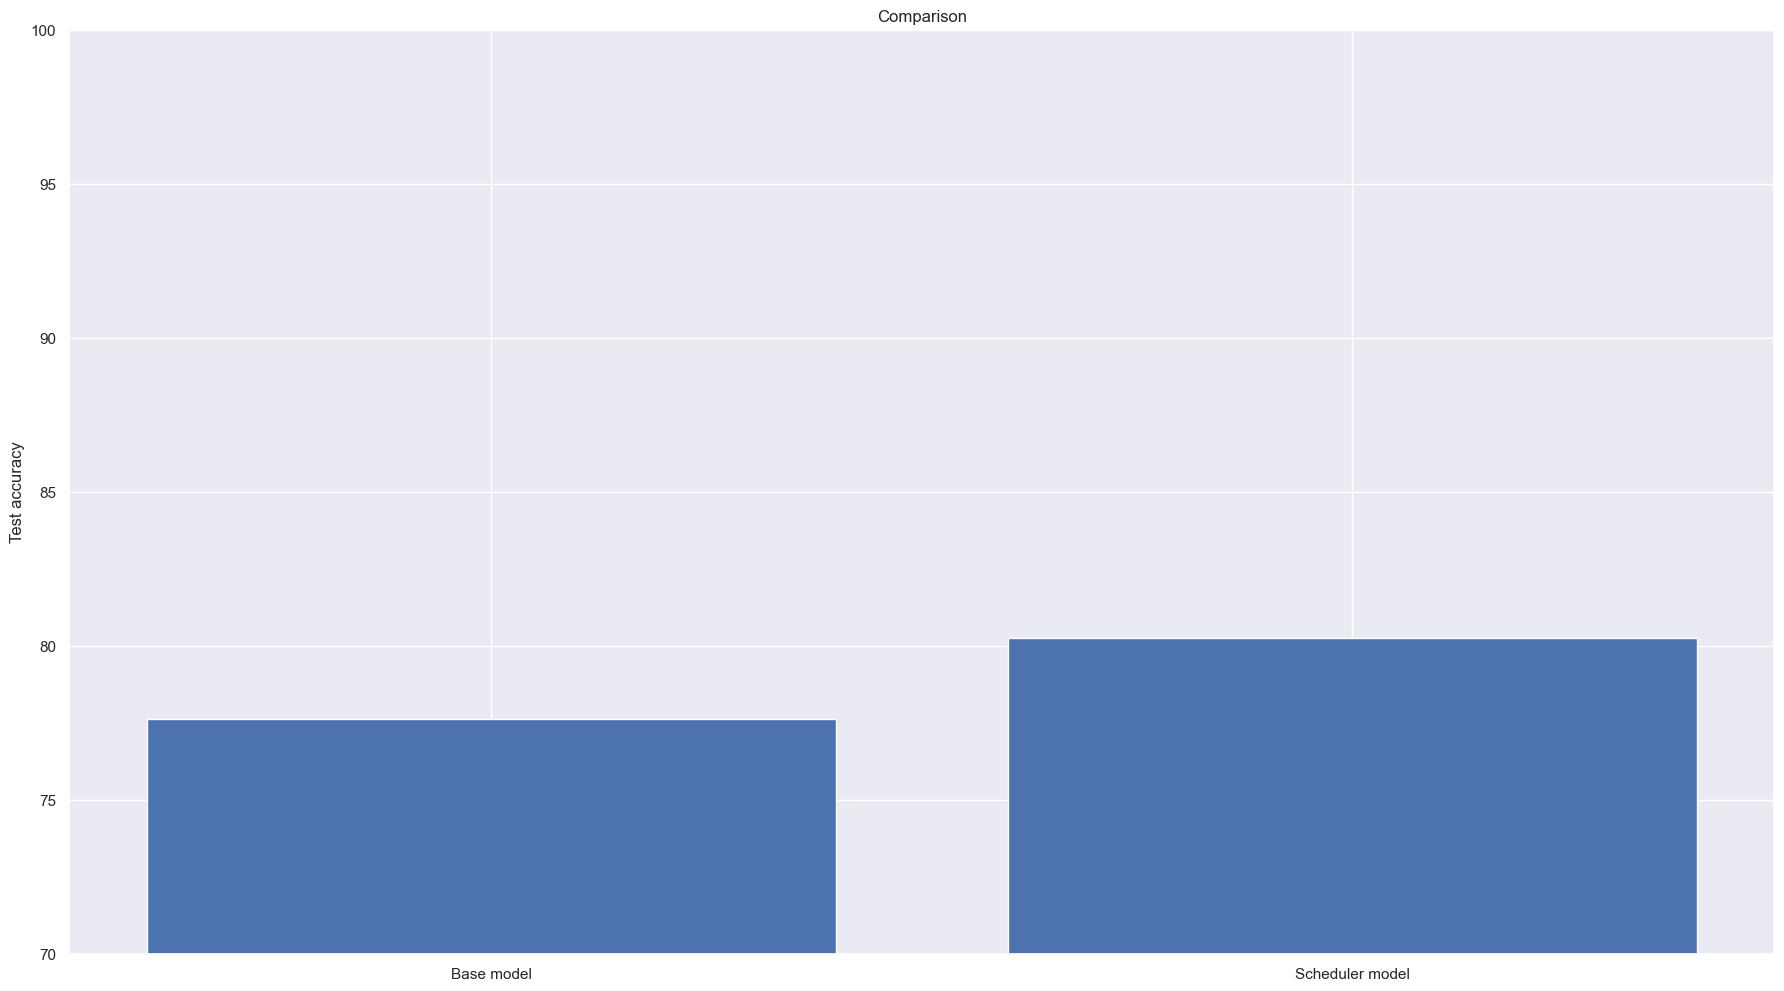

In [51]:
import matplotlib.pyplot as plt
base_model=77.63
scheduler_model=80.26
plt.bar(['Base model', 'Scheduler model'], [base_model,scheduler_model])
plt.ylim(70, 100)
plt.ylabel('Test accuracy')
plt.title('Comparison')


#### Batch Normalization

In [41]:
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_prob):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits
dropout_prob=0.2
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=NeuralNetwork(dropout_prob).to(device)
criterion=nn.CrossEntropyLoss()
batch_size=64
num_epochs=10
learning_rate=0.001
optimizer=torch.optim.Adagrad(model.parameters(), lr=learning_rate)
X_train_tensor=torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor=torch.tensor(y_train.values, dtype=torch.long).to(device)
for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X=X_train_tensor[i:i+batch_size].to(device)
        batch_y=y_train_tensor[i:i+batch_size].to(device)
        optimizer.zero_grad()
        logits=model(batch_X)
        #print(logits)
        loss=criterion(logits,batch_y)
        loss.backward()
        optimizer.step()
        if(i%100==0):
            print('Epoch',epoch+1,'/',num_epochs, 'Loss',loss.item())        
X_test_tensor=torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor=torch.tensor(y_test.values, dtype=torch.long).to(device)
model.eval()
with torch.no_grad():
    logits=model(X_test_tensor)
    pred_probab=nn.Softmax(dim=1)(logits)
    y_pred=pred_probab.argmax(1)
    accuracy=(y_pred==y_test_tensor).float().mean().item()*100
print('Accuracy of the testing data:',accuracy)


Epoch 1 / 10 Loss 0.6631494760513306
Epoch 2 / 10 Loss 0.5759186148643494
Epoch 3 / 10 Loss 0.48234447836875916
Epoch 4 / 10 Loss 0.5417579412460327
Epoch 5 / 10 Loss 0.5483995676040649
Epoch 6 / 10 Loss 0.5270978808403015
Epoch 7 / 10 Loss 0.5629360675811768
Epoch 8 / 10 Loss 0.5143206119537354
Epoch 9 / 10 Loss 0.5116649270057678
Epoch 10 / 10 Loss 0.5150882005691528
Accuracy of the testing data: 80.26315569877625


Text(0.5, 1.0, 'Comparison')

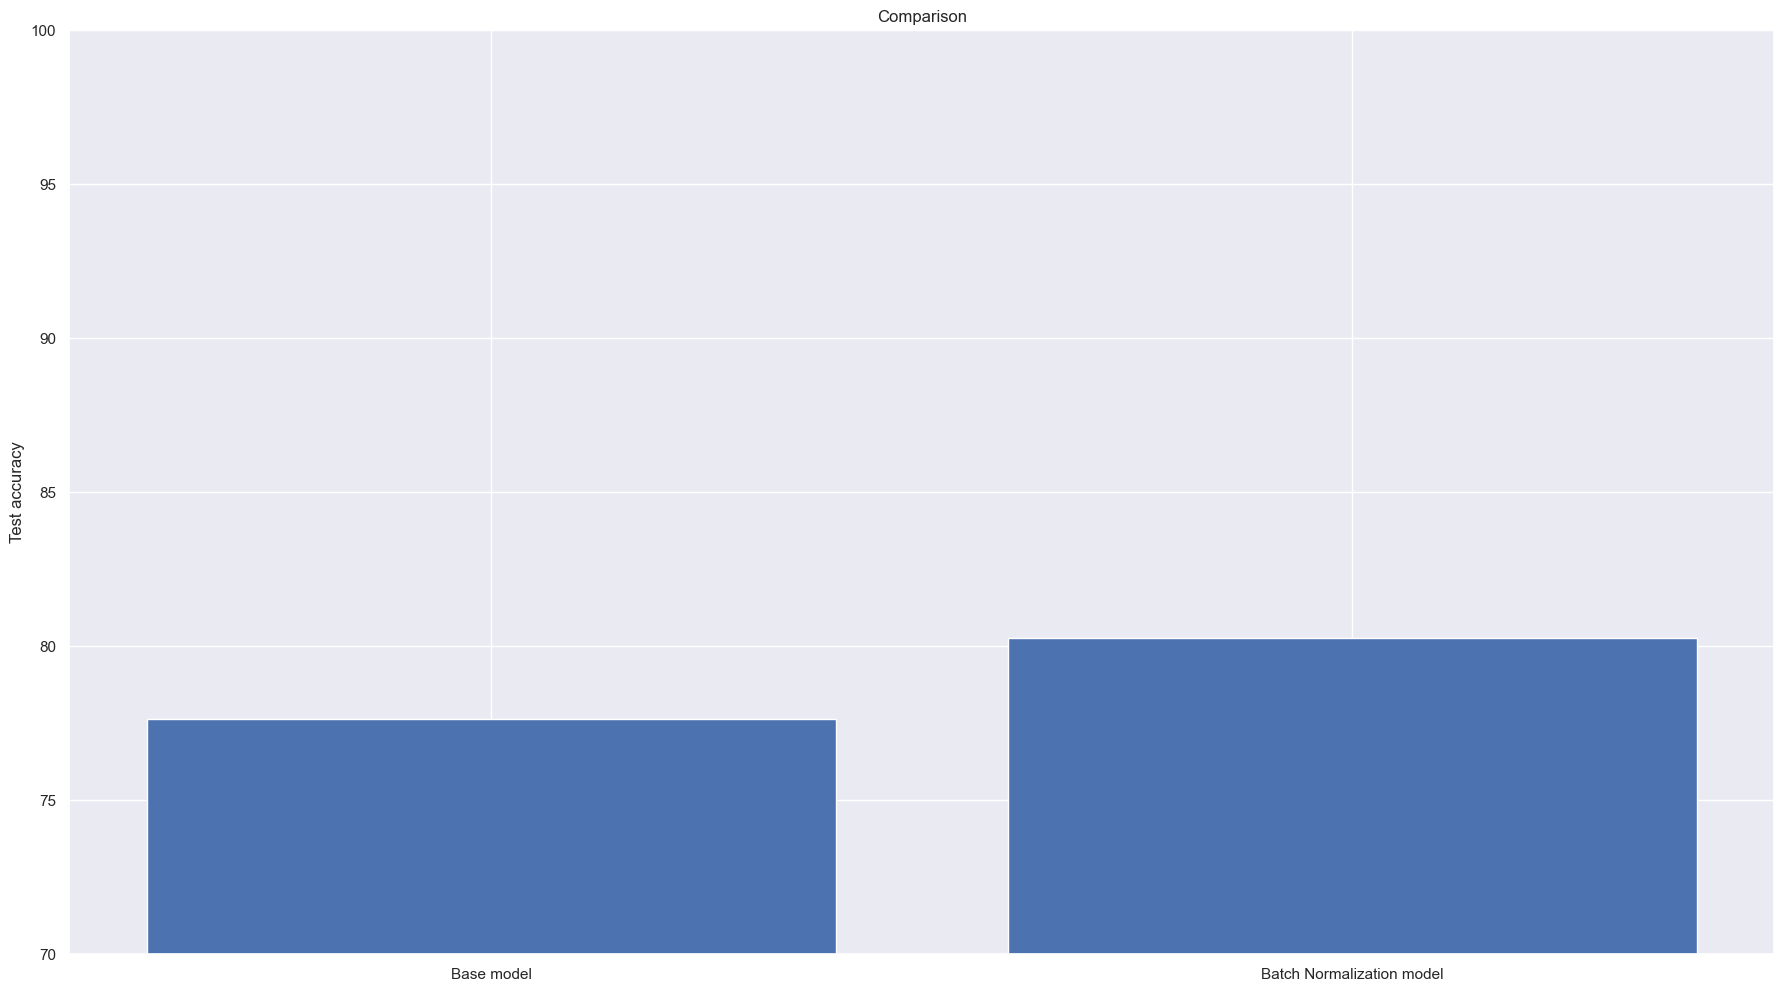

In [43]:
import matplotlib.pyplot as plt
base_model=77.63
batch_norm_model=80.26
plt.bar(['Base model', 'Batch Normalization model'], [base_model, batch_norm_model])
plt.ylim(70, 100)
plt.ylabel('Test accuracy')
plt.title('Comparison')


#### L2 Regularization

In [45]:
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_prob):
        super(NeuralNetwork, self).__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(7, 128),
            nn.Tanh(),
            nn.Dropout(dropout_prob),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits
dropout_prob=0.2
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=NeuralNetwork(dropout_prob).to(device)
criterion=nn.CrossEntropyLoss()
batch_size=64
num_epochs=10
learning_rate=0.001
weight_decay=0.001
optimizer=torch.optim.Adagrad(model.parameters(),lr=learning_rate,weight_decay=weight_decay)
X_train_tensor=torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor=torch.tensor(y_train.values, dtype=torch.long).to(device)
for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X=X_train_tensor[i:i+batch_size].to(device)
        batch_y=y_train_tensor[i:i+batch_size].to(device)
        optimizer.zero_grad()
        logits=model(batch_X)
        loss=criterion(logits, batch_y)
        loss.backward()
        optimizer.step()
        if(i%100==0):
            print('Epoch', epoch+1, '/', num_epochs, 'Loss', loss.item())        
X_test_tensor=torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor=torch.tensor(y_test.values, dtype=torch.long).to(device)
model.eval()
with torch.no_grad():
    logits=model(X_test_tensor)
    pred_probab=nn.Softmax(dim=1)(logits)
    y_pred=pred_probab.argmax(1)
    accuracy=(y_pred==y_test_tensor).float().mean().item()*100
print('Accuracy of the testing data:', accuracy)


Epoch 1 / 10 Loss 0.6997446417808533
Epoch 2 / 10 Loss 0.6081111431121826
Epoch 3 / 10 Loss 0.5660947561264038
Epoch 4 / 10 Loss 0.5413526892662048
Epoch 5 / 10 Loss 0.5316393971443176
Epoch 6 / 10 Loss 0.548005223274231
Epoch 7 / 10 Loss 0.5136756300926208
Epoch 8 / 10 Loss 0.527540922164917
Epoch 9 / 10 Loss 0.5120639204978943
Epoch 10 / 10 Loss 0.5010089874267578
Accuracy of the testing data: 79.6052634716034


Text(0.5, 1.0, 'Comparison')

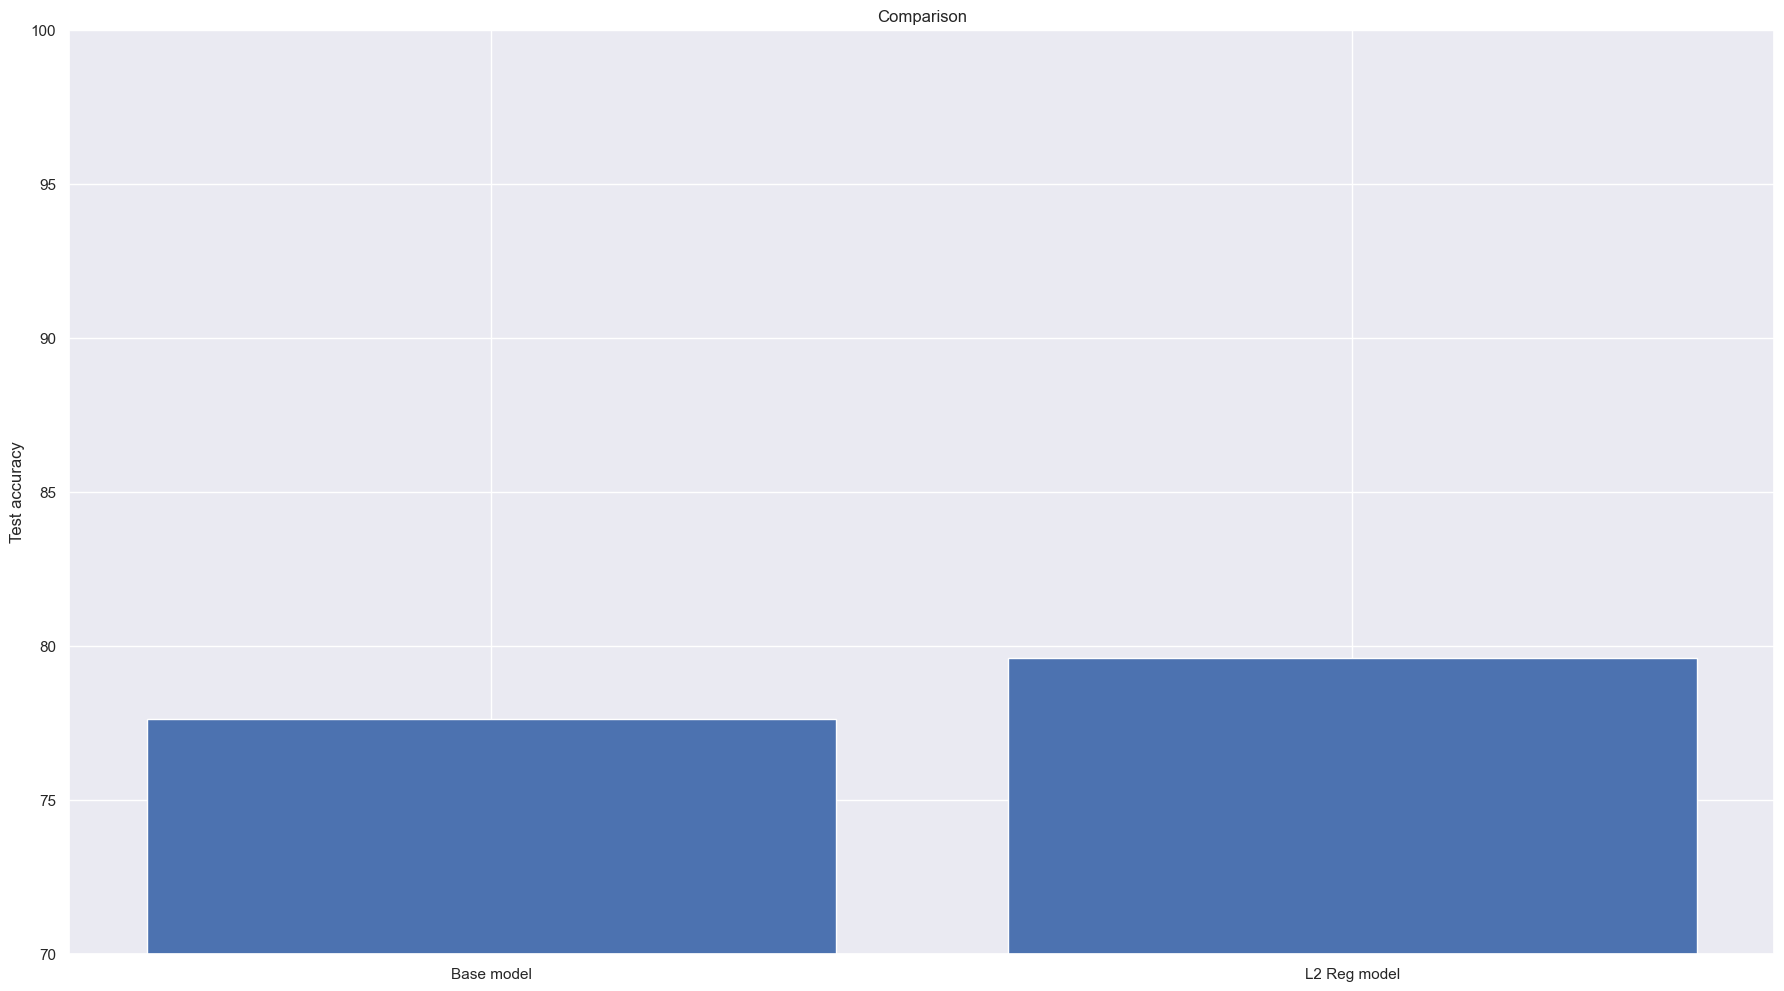

In [57]:
import matplotlib.pyplot as plt
base_model=77.63
L2_model=79.60
plt.bar(['Base model', 'L2 Reg model'], [base_model, L2_model])
plt.ylim(70, 100)
plt.ylabel('Test accuracy')
plt.title('Comparison')


#### Gradient Clipping

In [55]:
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_prob):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.Tanh(),
            nn.Dropout(dropout_prob),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Dropout(dropout_prob),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits
dropout_prob=0.2
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=NeuralNetwork(dropout_prob).to(device)
criterion=nn.CrossEntropyLoss()
batch_size=64
num_epochs=10
learning_rate=0.001
max_grad_norm=1.0
optimizer=torch.optim.Adagrad(model.parameters(),lr=learning_rate)
X_train_tensor=torch.tensor(X_train.values,dtype=torch.float32).to(device)
y_train_tensor=torch.tensor(y_train.values,dtype=torch.long).to(device)
for epoch in range(num_epochs):
    for i in range(0,len(X_train_tensor),batch_size):
        batch_X=X_train_tensor[i:i+batch_size].to(device)
        batch_y=y_train_tensor[i:i+batch_size].to(device)
        optimizer.zero_grad()
        logits=model(batch_X)
        loss=criterion(logits,batch_y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(),max_grad_norm)
        optimizer.step()
        if(i%100==0):
            print('Epoch',epoch+1,'/',num_epochs,'Loss',loss.item())
X_test_tensor=torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor=torch.tensor(y_test.values, dtype=torch.long).to(device)
model.eval()
with torch.no_grad():
    logits=model(X_test_tensor)
    pred_probab=nn.Softmax(dim=1)(logits)
    y_pred=pred_probab.argmax(1)
    accuracy=(y_pred==y_test_tensor).float().mean().item()*100
print('Accuracy of the testing data:', accuracy)

Epoch 1 / 10 Loss 0.674139142036438
Epoch 2 / 10 Loss 0.6020605564117432
Epoch 3 / 10 Loss 0.5618566870689392
Epoch 4 / 10 Loss 0.5455199480056763
Epoch 5 / 10 Loss 0.5276280641555786
Epoch 6 / 10 Loss 0.5262647867202759
Epoch 7 / 10 Loss 0.5293018221855164
Epoch 8 / 10 Loss 0.5100986361503601
Epoch 9 / 10 Loss 0.49590232968330383
Epoch 10 / 10 Loss 0.5331529974937439
Accuracy of the testing data: 79.6052634716034


Text(0.5, 1.0, 'Comparison')

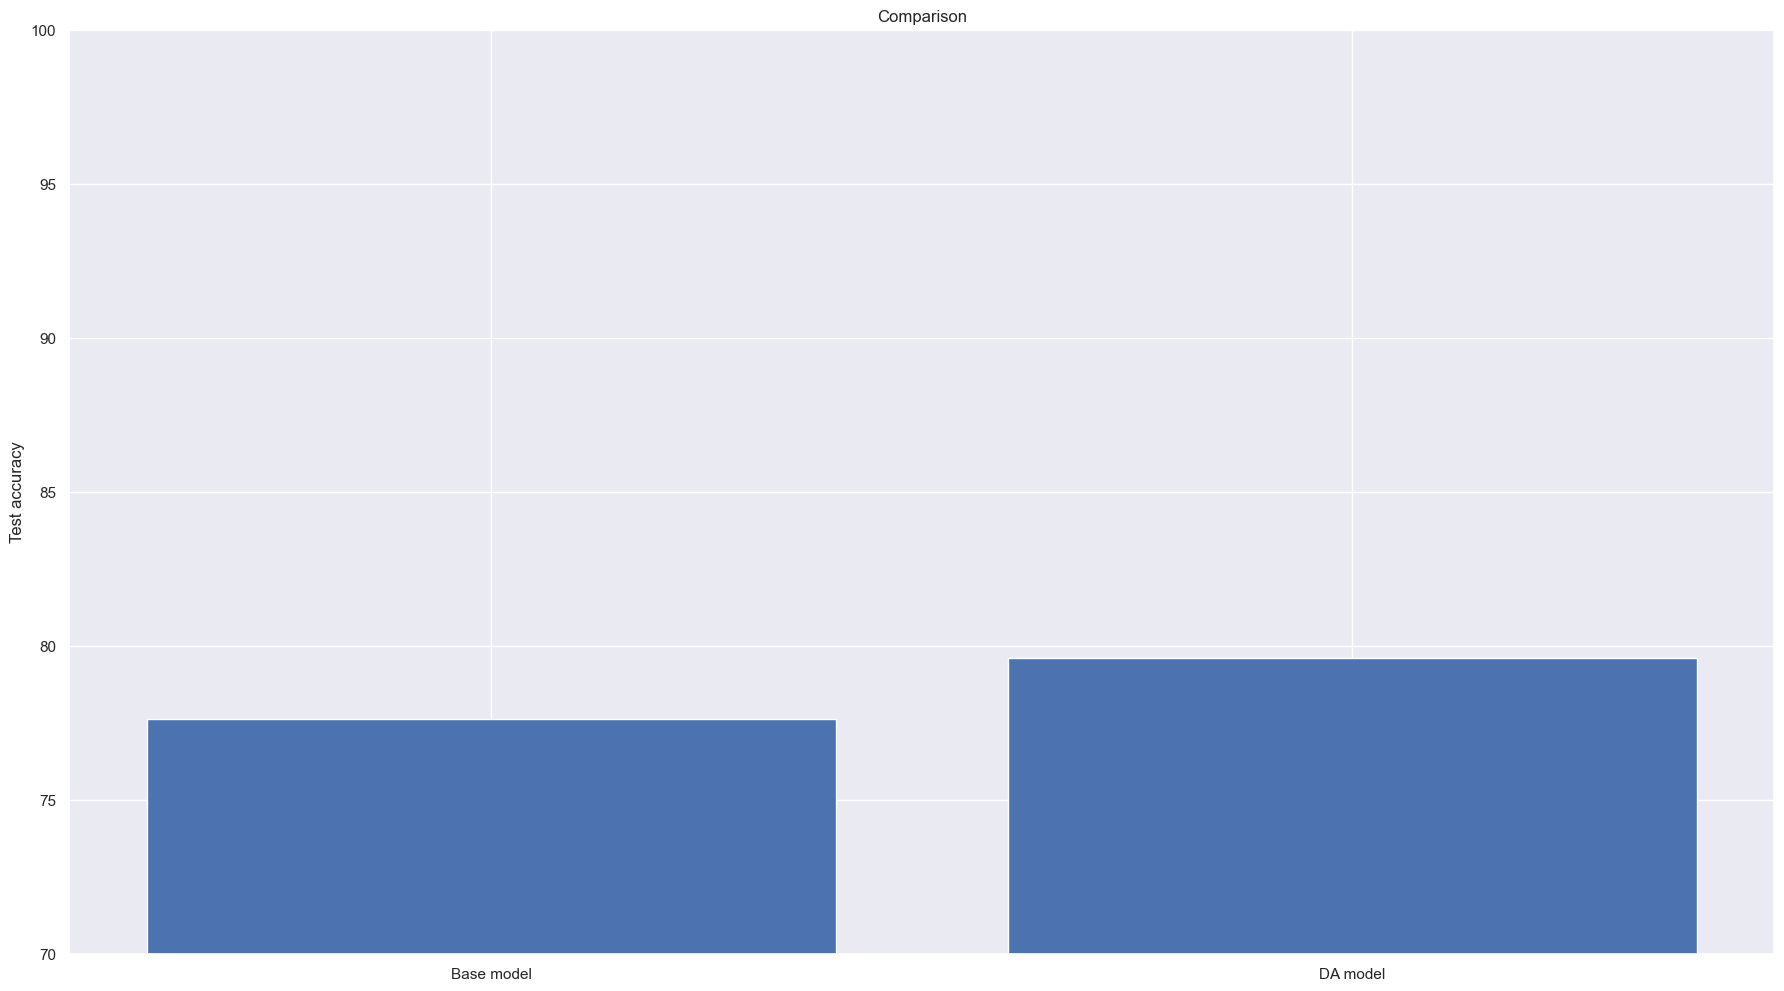

In [58]:
import matplotlib.pyplot as plt
base_model=77.63
DA=79.60
plt.bar(['Base model', 'DA model'],[base_model, DA])
plt.ylim(70, 100)
plt.ylabel('Test accuracy')
plt.title('Comparison')


## References:

https://pytorch.org/docs/stable/tensors.html

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html